In [1]:
import pandas as pd
import csv
import math
df = pd.read_csv('results.csv')
df.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [50]:
team1 = input("Please enter Home Team:\n")
team2 = input("Please enter Away Team:\n")

team11 = df['home_team'] == team1
team22 = df['away_team'] == team2

writer = df[team11 & team22  ]
writer.to_csv('results_new.csv', index=False)

keep_col = ['home_team', 'away_team', 'home_score', 'away_score']
new_reader = writer[keep_col]
new_reader.to_csv("results_new.csv", index=False)

Please enter Home Team:
Wales
Please enter Away Team:
Scotland


In [51]:
df = pd.read_csv('results_new.csv')
median_home_score=math.floor(df.home_score.median())
median_away_score=math.floor(df.away_score.median())
df.home_score=df.home_score.fillna(median_home_score)
df.away_score=df.away_score.fillna(median_away_score)
df.head()

,home_team,away_team,home_score,away_score
0,Wales,Scotland,0,2
1,Wales,Scotland,0,3
2,Wales,Scotland,1,5
3,Wales,Scotland,0,3
4,Wales,Scotland,1,8


In [52]:
w = pd.read_csv('results_new.csv')
w.loc[w.home_team ==team1, 'home_team'] = 1
w.loc[w.away_team ==team2, 'away_team'] = 2
w.head()


,home_team,away_team,home_score,away_score
0,1,2,0,2
1,1,2,0,3
2,1,2,1,5
3,1,2,0,3
4,1,2,1,8


In [53]:
x=w
y=df.home_score
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
logreg.fit(x,y)

C:\Users\KostasDelenikas\miniconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [54]:
logreg.predict(x)

array([0, 0, 1, 0, 1, 0, 0, 3, 0, 2, 2, 0, 1, 0, 3, 1, 3, 2, 0, 1, 2, 2,
       0, 2, 2, 2, 3, 1, 2, 3, 1, 1, 1, 0, 2, 0, 2, 2, 3, 1, 3, 0, 0, 2,
       0, 0, 3, 2, 0, 1, 3, 3, 1, 2], dtype=int64)

In [55]:
y_pred=logreg.predict(x)
len(y_pred)

54

In [56]:
from sklearn import metrics
metrics.accuracy_score(y,y_pred)

0.9814814814814815

In [57]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [58]:
y_pred=knn.predict(x)
metrics.accuracy_score(y,y_pred)

0.9074074074074074

In [59]:
knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(x,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [60]:
 y_pred=knn.predict(x)
metrics.accuracy_score(y,y_pred)

1.0

In [61]:
x.shape

(54, 4)

In [62]:
y.shape

(54,)

In [63]:
from sklearn.model_selection import train_test_split
x.shape

(54, 4)

In [64]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.4,random_state=4)
x_train.shape

(32, 4)

In [65]:
x_test.shape

(22, 4)

In [66]:
y_train.shape

(32,)

In [67]:
y_test.shape

(22,)

In [68]:
logreg=LogisticRegression()
logreg.fit(x_train,y_train)
y_pred=knn.predict(x_test)
metrics.accuracy_score(y_test,y_pred)

1.0

In [69]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [70]:
>>> y_pred=knn.predict(x_test)
>>> metrics.accuracy_score(y_test,y_pred)

0.6363636363636364

In [71]:
k_range=range(1,26)
scores=[]
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))
scores


[0.8636363636363636,
 0.8636363636363636,
 0.8181818181818182,
 0.8636363636363636,
 0.6363636363636364,
 0.7727272727272727,
 0.7272727272727273,
 0.6818181818181818,
 0.6363636363636364,
 0.5909090909090909,
 0.5454545454545454,
 0.5454545454545454,
 0.5,
 0.5,
 0.5,
 0.45454545454545453,
 0.45454545454545453,
 0.45454545454545453,
 0.45454545454545453,
 0.45454545454545453,
 0.45454545454545453,
 0.45454545454545453,
 0.45454545454545453,
 0.45454545454545453,
 0.3181818181818182]

Text(0, 0.5, 'Testing Accuracy')

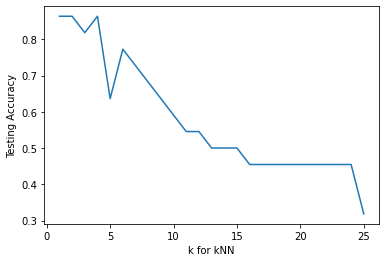

In [72]:
import matplotlib.pyplot as plt
plt.plot(k_range,scores)
plt.xlabel('k for kNN')
plt.ylabel('Testing Accuracy')


In [73]:
from sklearn import linear_model
reg1 = linear_model.LinearRegression()
reg1.fit(w[['home_team', 'away_team']] ,w.home_score)
reg2 = linear_model.LinearRegression()
reg2.fit(w[['home_team', 'away_team']] ,w.away_score)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [74]:
reg1.predict([[1,2]]),reg2.predict([[1,2]])

(array([1.35185185]), array([2.01851852]))